<a href="https://colab.research.google.com/github/kslim1025/TF_Keras_RNN/blob/master/LSTM_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

[[1.         0.95305883]
 [0.         0.84050296]
 [0.         0.38284697]
 [0.         0.93691631]
 [0.         0.82154942]
 [0.         0.13197223]
 [0.         0.44436892]
 [0.         0.72869181]
 [0.         0.38669829]
 [0.         0.98421917]
 [0.         0.85086587]
 [0.         0.31319321]
 [0.         0.48905776]
 [0.         0.66141375]
 [0.         0.8106494 ]
 [0.         0.48487268]
 [0.         0.92272585]
 [0.         0.88971431]
 [0.         0.03832852]
 [0.         0.10385345]
 [0.         0.52613899]
 [1.         0.80325125]
 [0.         0.39734321]
 [0.         0.16649816]
 [0.         0.65767294]
 [0.         0.31349585]
 [0.         0.34431353]
 [0.         0.79457595]
 [0.         0.07386548]
 [0.         0.3581056 ]
 [0.         0.8333013 ]
 [0.         0.34931013]
 [0.         0.15562425]
 [0.         0.70120669]
 [0. 

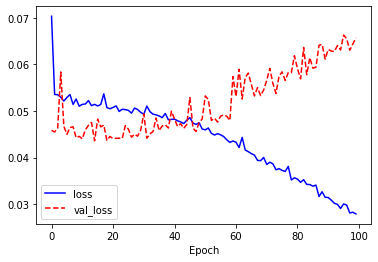

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
correctness: -143.4090909090909 %
correctness: -143.63636363636363 %
correctness: -143.86363636363637 %
correctness: -144.0909090909091 %
correctness: -144.3181818181818 %
correctness: -144.54545454545456 %
correctness: -144.77272727272728 %
correctness: -145.0 %
correctness: -145.22727272727275 %
correctness: -145.45454545454547 %
correctness: -145.6818181818182 %
correctness: -145.9090909090909 %
correctness: -146.13636363636365 %
correctness: -146.36363636363637 %
correctness: -146.5909090909091 %
correctness: -146.8181818181818 %
correctness: -147.04545454545453 %
correctness: -147.27272727272725 %
correctness: -147.5 %
correctness: -147.72727272727272 %
correctness: -147.95454545454544 %
correctness: -148.1818181818182 %
correctness: -148.4090909090909 %
correctness: -148.63636363636363 %
correctness: -148.86363636363635 %
correctness: -149.0909090909091 %
correctness: -149.3181818181818 %
correctness: -149.54545454545453 %
correctness: -149.772

In [7]:
# MNIST 문자열 분석으로 유명한 데이터셋이 패션에 관한 데이터 세트를 만듬 그게 FashionMINIST 데이터셋이다.
# 데이터 이미지가 0에서 255까지 값을 가지는 28x28이미지라는 것을 확인가능
# 정답이 되는 라벨을 확인하기 위해 print를 붙여서  확인
# 외부 데이터를 이용한 정제과정
# ctrl+enter를 사용한 런타임가능
# !nvidia-smi : 어떤 GPU를 사용하는지 확인가능한 명령어 
#

try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

# 넘파이는 수학과 과학 연산에 특화된 파이썬 모듈로 딥러닝에서도 유용하게 사용된다.

import numpy as np;
import tensorflow as tf;
import pandas as pd;
import matplotlib.pyplot as plt;
import math;
################################################################################
!nvidia-smi
       
#+-----------------------------------------------------------------------------+
#| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
#|-------------------------------+----------------------+----------------------+
#| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
#| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
#|                               |                      |               MIG M. |
#|===============================+======================+======================|
#|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
#| N/A   51C    P0    35W / 250W |   1581MiB / 16280MiB |      0%      Default |
#|                               |                      |                 ERR! |
#+-------------------------------+----------------------+----------------------+
#                                                                               
#+-----------------------------------------------------------------------------+
#| Processes:                                                                  |
#|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
#|        ID   ID                                                   Usage      |
#|=============================================================================|
#|  No running processes found                                                 |
#+-----------------------------------------------------------------------------+

################################################################################

X = []
Y = []

for i in range(6000):
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다.
  lst = np.random.rand(100)
  
  # 마킹할 숫자 2개의 인덱스를 뽑습니다.
  idx = np.random.choice(100, 2, replace=False)
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다
  zeros = np.zeros(100)
  zeros[idx] = 1

  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
  X.append(np.array(list(zip(zeros, lst))))
  #마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.SimpleRNN(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


#SimpleRNN 네트워크 학습

X = np.array(X)
Y = np.array(Y)

#2560개의 데이터만 학습 진행, 검증 데이터는 20%로 지정
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[:2560:2560+5])
# 5개의 테스트 데이터에 대한 예측을 표시하기
for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
  prediction = model.predict(X[2560:])
  fail = 0
  for i in range(len(prediction)):
    #오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i])> 0.04:
      fail += 1
      print('correctness:', (440 - fail) / 440 * 100, '%')

#LSTM 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()